In [1]:
import csv
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
priceData = pd.read_csv('SP_500_close_2015.csv',index_col = 0)
priceData.head()

,MMM,ABT,ABBV,ACN,ATVI,AYI,ADBE,AAP,AES,AET,...,XEL,XRX,XLNX,XL,XYL,YHOO,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,156.678596,43.160459,61.986410,86.129228,19.765196,139.234407,72.339996,158.132353,12.860543,87.354435,...,33.927597,13.191375,41.513829,32.998169,37.072501,50.169998,69.542301,110.963875,27.853656,42.723658
2015-01-05,153.145069,43.170070,60.819874,84.674997,19.490271,135.889914,71.980003,156.047994,12.494440,86.173965,...,33.542483,12.903563,40.752108,33.199318,34.765202,49.130001,68.129346,115.103219,26.810004,42.467175
2015-01-06,151.511999,42.679830,60.518833,84.064223,19.126976,134.187800,70.529999,155.938290,12.212822,86.301853,...,33.720953,12.730876,40.161775,33.362155,34.560759,49.209999,67.293113,114.127520,25.786046,42.052863
2015-01-07,152.610267,43.025880,62.964797,85.828689,18.714587,136.566769,71.110001,159.289228,12.231597,88.033197,...,34.012134,12.893969,40.180818,33.381309,34.833350,48.590000,69.523080,116.965922,26.032190,42.920947
2015-01-08,156.267949,43.910238,63.623323,87.137495,18.901144,141.344618,72.919998,160.685446,12.419342,90.885990,...,34.406643,13.248937,41.075840,33.927287,35.096207,50.230000,70.734178,118.207726,26.396482,43.581878


In [3]:
firms = pd.read_csv("SP_500_firms.csv")
firms.head()

,Symbol,Name,Sector
0,MMM,3M Company,Industrials
1,ABT,Abbott Laboratories,Health Care
2,ABBV,AbbVie,Health Care
3,ACN,Accenture plc,Information Technology
4,ATVI,Activision Blizzard,Information Technology


In [4]:
percent_change = priceData.pct_change()
percent_change = percent_change.drop(percent_change.index[0])
percent_change.head()

#Or equivalently without using Pandas' built-in 
#percent change function.
percent_changeD = {}
for i in percent_change:
    percent_changeD[i] = []
    for j in range(1,(len(priceData))):
        ret = (priceData[i][j]-priceData[i][j-1])/priceData[i][j-1]
        percent_changeD[i].append(ret)
        
percent_change2 = pd.DataFrame(data = percent_changeD,index=priceData.index[1:])

In [5]:
def fullname(ts):
    return firms[firms.Symbol == ts].Name.values[0]

currMax = 0
for i in percent_change2:
    for j in percent_change2.index:
        if percent_change2[i][j] > currMax:
            currMax = percent_change2[i][j]
            bestCo = i
            bestDate = j
            
print (fullname(bestCo), bestDate, currMax)

Freeport-McMoran Cp & Gld 2015-08-27 0.286616201466348


In [6]:
currMin = 1
for i in percent_change2:
    for j in percent_change2.index:
        if percent_change2[i][j] < currMin:
            currMin = percent_change2[i][j]
            worstCo = i
            worstDate = j

print (fullname(worstCo), worstDate, currMin)

Quanta Services Inc. 2015-10-16 -0.2850056957270392


In [7]:
AnnualReturn = {}
yearMax = -math.inf
for i in percent_change2:
    AnnualReturn[i] = (priceData[i][-1]-priceData[i][0])/priceData[i][0]
    if AnnualReturn[i] > yearMax:
        yearMax = AnnualReturn[i]
        maxCo = i

print (yearMax, maxCo, fullname(maxCo))

1.2945491196819041 NFLX Netflix Inc.


In [8]:
AnnualReturn = {}
yearMin = math.inf
for i in percent_change2:
    AnnualReturn[i] = (priceData[i][-1]-priceData[i][0])/priceData[i][0]
    if AnnualReturn[i] < yearMin:
        yearMin = AnnualReturn[i]
        minCo = i

print (yearMin, minCo, fullname(minCo))


-0.7697847497642084 CHK Chesapeake Energy


In [9]:
def mean(x):
    return float(sum(x)) / len(x)

def std(x):
    stdev = 0.0
    for value in x:
        difference = value - mean(x)
        stdev = stdev + (difference ** 2)
    stdev = (stdev / len(x))**(1/2)
    return stdev

In [10]:
Volatility = {}
volMax = -math.inf

for i in percent_change2:
    Volatility[i] = std(percent_change2[i])
    if Volatility[i] > volMax:
        volMax = Volatility[i]
        volMaxC = i
        
print (volMax, volMaxC, fullname(volMaxC))

0.04398338070543049 FCX Freeport-McMoran Cp & Gld


In [11]:
Volatility = {}
volMin = math.inf

for i in percent_change2:
    Volatility[i] = std(percent_change2[i])
    if Volatility[i] < volMin:
        volMin = Volatility[i]
        volMinC = i

print (volMin, volMinC, fullname(volMinC))

0.009044853669708705 KO The Coca Cola Company


In [56]:
def corr(x,y):
    xy = sum([a*b for a,b in zip(x,y)])
    x2 = sum([i**2 for i in x])
    y2 = sum([i**2 for i in y])
    n = len(x)
    numer = (n*xy - sum(x)*sum(y))
    denom = ((n*x2 - sum(x)**2)**(1/2) * (n*y2 - sum(y)**2)**(1/2))
    correlation = numer/denom
    return correlation

correlations = {}

for i in percent_change:
    correlations[i] = {}

for i in correlations:    
    for j in percent_change:
        correlations[i][j]=[]
    
for company1 in percent_change:
    for company2 in percent_change:
        if not correlations[company1][company2]:
            x=percent_change[company1]        
            y=percent_change[company2]
            if company1 == company2:
                correlations[company1][company2] = 1
                correlations[company2][company1] = 1
            else:
                correlations[company1][company2] = corr(x,y)
                correlations[company2][company1] = corr(x,y)
                
def corr_print(company1, company2):
    print ("The correlation coefficient between {} and {} is {}."
           .format(fullname(company1), fullname(company2), correlations[company1][company2]))

corr_print("AAPL", "MMM")

The correlation coefficient between Apple Inc. and 3M Company is 0.5157280000348696.


In [57]:
ticker_symbols = list(priceData.columns.values)

def top_bottomcorr(ts):
    corr_tb = []
    for ss in ticker_symbols:
        if ss == ts:
            continue
        corr_co = correlations[ts][ss]
        corr_tb.append((corr_co, ss))
    corr_tb.sort()    
    print ("Most Correlated:", fullname(corr_tb[-1][1]), "(", corr_tb[-1][0],")")
    print ("Least Correlated:", fullname(corr_tb[0][1]), "(", corr_tb[0][0],")")

In [59]:
top_bottomcorr("GOOG")

Most Correlated: Alphabet Inc Class A ( 0.9893650403946361 )
Least Correlated: Stericycle Inc ( 0.01714894347853482 )


In [28]:
correlations = percent_change.corr()

correlations = correlations.where(np.triu(np.ones(correlations.shape)).astype(np.bool))
correlations = correlations.stack().reset_index()
correlations.columns = ['Company1', 'Company2', 'Correlation']

correlation_tuples = [tuple(x) for x in correlations.values]

In [29]:
def mergeSort(array):
    if len(array) > 1:
        mid = len(array) //2
        left = array[:mid]
        right = array [mid:]
        mergeSort(left)
        mergeSort(right)

        i = 0
        j = 0
        k = 0
        while i < len(left) and j < len(right):
            if left[i][2] > right[j][2]:
                array[k] = left[i]
                i = i + 1
            else:
                array[k] = right[j]
                j = j + 1
            k = k+1
        while i < len(left):
            array[k] = left[i]
            i += 1
            k += 1
        while j < len(right):
            array[k] = right[j]
            j += 1
            k += 1
    return(array)

sortedWeights = mergeSort(correlation_tuples)

In [30]:
class Digraph():
    def __init__(self,filename = None):
        self.edges = {}
        self.numEdges = 0
    
    def addNode(self,node):       
        self.edges[node] = set()

    def add_Edge(self,src,dest,weight):
        if not self.hasNode(src): 
            self.addNode(src)
            self.edges[src] = {}
        if not self.hasNode(dest): 
            self.addNode(dest)
            self.edges[dest] = {}
        if not self.hasEdge(src, dest):
            self.numEdges += 1
            self.edges[src][dest] = weight
  
    def childrenOf(self, v):
        # Returns a node's children
        return self.edges[v].items()
        
    def hasNode(self, v):
        return v in self.edges
        
    def hasEdge(self, v, w):
        return w in self.edges[v]

    def listEdges(self):
        ll = []
        for src,values in self.edges.items():
            for dest,weight in values.items():
                ll.append([src,dest,weight])
        return ll
    
    def __str__(self):
        result = ''
        for src in self.edges:
            for dest,weight in self.edges[src].items():
                result = result + src + '->'\
                         + dest + ', length ' + str(weight) + '\n'
        return result[:-1]

class Graph(Digraph):
    def addEdge(self, src, dest, weight):
        Digraph.addEdge(self, src, dest, weight)
        Digraph.addEdge(self, dest, src, weight)

In [32]:
def init_graph(sortedWeights):
    graph = Graph()
    for x in sortedWeights:
         graph.add_Edge(x[0],x[1],weight = x[2])
    return graph

def init_nodePointers(graph):
    nodePointers = {src:src for src in graph.edges}
    return nodePointers

def init_nodeStarting(graph):
    nodeStarting = {src:True for src in graph.edges}
    return nodeStarting

def init_nodeBottom(graph):
    nodeBottom = {src:True for src in graph.edges}
    return nodeBottom

def findbottom(node, nodePointers):
    source = node
    destination = nodePointers[source]
    while destination != source:
        source = destination
        destination = nodePointers[source]
    return destination

def mergeSets(sortedWeights, k):
    sortedWeights = [value for value in sortedWeights
                     if value[0] != value[1]]
    graph = init_graph(sortedWeights)
    nodePointers = init_nodePointers(graph)
    nodeStarting = init_nodeStarting(graph)
    nodeBottom = init_nodeBottom(graph)
    counter = 0
    for key in sortedWeights:
        if counter < k:
            bottom1 = findbottom(key[0], nodePointers)
            bottom2 = findbottom(key[1], nodePointers)
            if bottom1 != bottom2:
                nodePointers[bottom2] = bottom1
                nodeBottom[bottom2] = False
                nodeStarting[bottom1] = False
                
            counter += 1
    return (nodePointers, nodeStarting, nodeBottom)

def recoverSets(nodePointers, nodeStarting, nodeBottom):
    dict = {}
    for b_key, b_value in nodeBottom.items():
        if b_value:
            dict.setdefault(b_key, set())
            for s_key, s_value in nodeStarting.items():
                if s_value and findbottom(s_key, nodePointers)== b_key:
                    bottom = findbottom(s_key, nodePointers)
                    current_node = s_key
                    while current_node != bottom:
                        dict[b_key].add(current_node)
                        current_node = nodePointers[current_node]
            dict[b_key].add(b_key)
    return list(dict.values())

In [37]:
nodePointers, nodeStarting, nodeBottom = mergeSets(sortedWeights, 100000)
print(recoverSets(nodePointers, nodeStarting, nodeBottom))
# print("For k = 100000, " + str(len(cluster_100000)) + " clusters are generated." + '\n')

[{'ALL', 'CXO', 'GS', 'RIG', 'URI', 'PX', 'FOX', 'SEE', 'DGX', 'WFC', 'MA', 'FLS', 'HOLX', 'YUM', 'LEG', 'PXD', 'XEL', 'VRSK', 'ADM', 'CNP', 'SNA', 'HBAN', 'YHOO', 'PBCT', 'CVS', 'AVB', 'EIX', 'RTN', 'NLSN', 'ADP', 'NAVI', 'HRS', 'NBL', 'IFF', 'PRGO', 'EA', 'EMR', 'UNM', 'ADSK', 'MSI', 'SRCL', 'PKI', 'UNP', 'ORLY', 'FSLR', 'LVLT', 'CAT', 'GILD', 'BAX', 'SYF', 'ANTM', 'DVN', 'XEC', 'UDR', 'CTSH', 'AMT', 'WHR', 'TAP', 'CLX', 'CA', 'PEG', 'DAL', 'SPLS', 'F', 'ESS', 'DTE', 'AVY', 'ALLE', 'MCK', 'PM', 'PNR', 'LYB', 'CB', 'R', 'ZTS', 'ATVI', 'TSN', 'PFE', 'COP', 'CAH', 'MOS', 'NKE', 'HRB', 'HRL', 'CRM', 'NEM', 'APH', 'MO', 'EMC', 'DD', 'CMI', 'PGR', 'ACN', 'FBHS', 'TMO', 'NRG', 'VNO', 'BBT', 'HAS', 'JCI', 'HOT', 'FTI', 'SWK', 'BIIB', 'GPN', 'EXC', 'SYK', 'AET', 'HSY', 'VIAB', 'REGN', 'HCP', 'BDX', 'PFG', 'C', 'IPG', 'STT', 'SJM', 'LNC', 'PRU', 'AMGN', 'MJN', 'KMI', 'LOW', 'ZION', 'ENDP', 'UTX', 'NTRS', 'V', 'VRSN', 'NI', 'KSU', 'VZ', 'MAR', 'HP', 'JNPR', 'KLAC', 'LUK', 'FRT', 'ES', 'HUM', 'T

In [41]:
nodePointers, nodeStarting, nodeBottom = mergeSets(sortedWeights, 2000)
cluster_2000 = recoverSets(nodePointers, nodeStarting, nodeBottom)
print(cluster_2000)
print("For k = 2000, " + str(len(cluster_2000)) + " clusters are generated." + '\n')

[{'GOOG', 'GOOGL'}, {'NWSA', 'NWS'}, {'DISCA', 'DISCK', 'SNI'}, {'PHM', 'DHI', 'LEN'}, {'CCL', 'RCL'}, {'ANTM', 'AET', 'UNH', 'CI', 'CNC'}, {'HCA', 'UHS'}, {'ROST', 'TJX'}, {'VLO', 'TSO', 'MPC', 'PSX'}, {'MO', 'PM', 'RAI'}, {'VMC', 'MLM'}, {'RSG', 'WM'}, {'DGX', 'LH'}, {'DAL', 'ALK', 'LUV', 'AAL', 'UAL'}, {'WYN', 'MAR', 'HOT'}, {'EXPD', 'CHRW'}, {'AMAT', 'LRCX'}, {'AVGO', 'SWKS'}, {'GWW', 'FAST'}, {'AZO', 'ORLY'}, {'FOXA', 'CMCSA', 'DIS', 'FOX', 'TWX'}, {'GM', 'F'}, {'NSC', 'CSX', 'UNP', 'KSU'}, {'WDC', 'STX'}, {'HCN', 'DUK', 'ED', 'AIV', 'ESS', 'AWK', 'LNT', 'D', 'DTE', 'PPL', 'ETR', 'VNO', 'DLR', 'AEP', 'FE', 'NI', 'AEE', 'PLD', 'XEL', 'PNW', 'SRE', 'WEC', 'SCG', 'CNP', 'GGP', 'SLG', 'UDR', 'AMT', 'FRT', 'PCG', 'ES', 'BXP', 'CMS', 'SO', 'O', 'EXC', 'EQR', 'AVB', 'EXR', 'EIX', 'SPG', 'VTR', 'PSA', 'HCP', 'KIM', 'CCI', 'PEG'}, {'LNC', 'CXO', 'PH', 'GS', 'PRU', 'APC', 'AMGN', 'RIG', 'MRK', 'PX', 'SLB', 'FLR', 'KMI', 'LOW', 'ZION', 'FISV', 'UTX', 'CFG', 'TYC', 'NTRS', 'WFC', 'V', 'MA', '

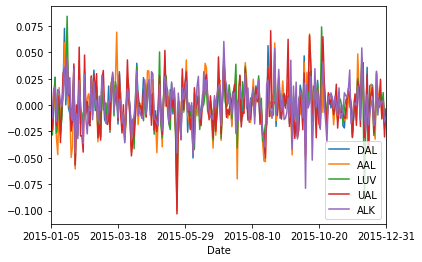

In [42]:
percent_change[['DAL', 'AAL', 'LUV', 'UAL', 'ALK']].plot()

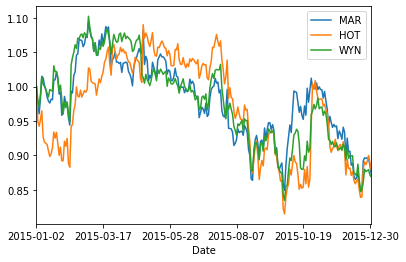

In [48]:
pricesScaled = priceData.divide(priceData.iloc[0])
pricesScaled[['MAR', 'HOT', 'WYN']].plot()